In [1]:
import wget
import os
os.remove('COVID-19_casus_landelijk.csv')
wget.download('https://data.rivm.nl/covid-19/COVID-19_casus_landelijk.csv')   

'COVID-19_casus_landelijk.csv'

In [2]:
import pandas as pd
data = pd.read_csv('COVID-19_casus_landelijk.csv',sep=';',index_col='Date_statistics',parse_dates=True)
data['n']=1
data.tail()

,Date_file,Date_statistics_type,Agegroup,Sex,Province,Hospital_admission,Deceased,Week_of_death,Municipal_health_service,n
Date_statistics,,,,,,,,,,
2021-01-12,2021-01-12 10:00:00,DON,70-79,Female,Zuid-Holland,Unknown,Unknown,NaN,GGD Haaglanden,1
2021-01-12,2021-01-12 10:00:00,DPL,40-49,Female,Zuid-Holland,Unknown,Unknown,NaN,GGD Hollands-Midden,1
2021-01-12,2021-01-12 10:00:00,DON,40-49,Male,Gelderland,Unknown,Unknown,NaN,GGD Gelderland-Zuid,1
2021-01-12,2021-01-12 10:00:00,DON,50-59,Male,Noord-Holland,Unknown,Unknown,NaN,GGD Zaanstreek/Waterland,1
2021-01-12,2021-01-12 10:00:00,DON,60-69,Male,Noord-Brabant,Unknown,Unknown,NaN,GGD Hart voor Brabant,1


Text(0.5, 1.0, 'Positieve tests per dag')

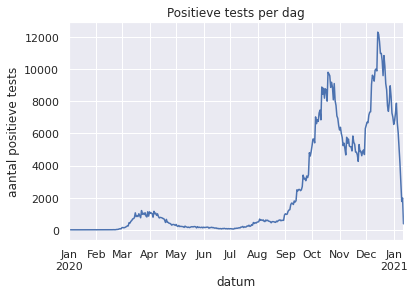

In [40]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
%matplotlib inline
count=data['n']
daily=count.resample('D').sum()
daily.plot()
plt.ylabel('aantal positieve tests')
plt.xlabel('datum')
plt.title('Positieve tests per dag')

Text(0.5, 1.0, 'Positieve tests per week')

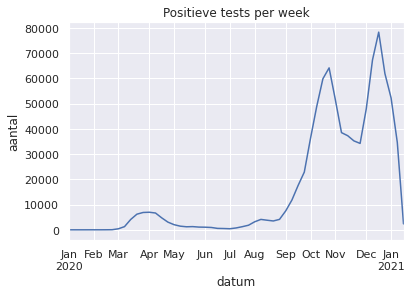

In [39]:
weekly=count.resample('W').sum()
weekly.plot()
plt.ylabel('aantal')
plt.xlabel('datum')
plt.title('Positieve tests per week')

Text(0.5, 1.0, 'positieve tests per 7 dagen')

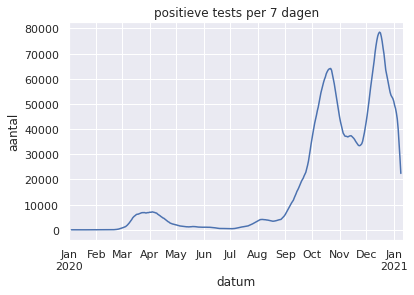

In [38]:
daily.rolling(7,center=True).sum().plot()
plt.ylabel('aantal')
plt.xlabel('datum')
plt.title('Positieve tests per 7 dagen')

Text(0.5, 1.0, 'Zuid-Holland')

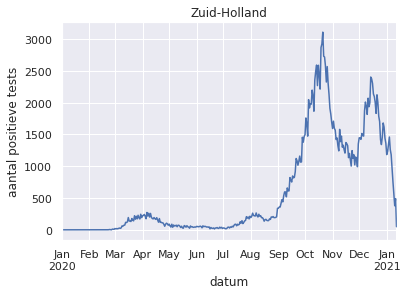

In [6]:
province='Zuid-Holland'
prov_data=data[data.Province == province]
prov_count=prov_data['n']
dailyprov=prov_count.resample('D').sum()
dailyprov.plot()
plt.ylabel('aantal positieve tests')
plt.xlabel('datum')
plt.title(province)

In [7]:
os.remove('COVID-19_reproductiegetal.json')
wget.download('https://data.rivm.nl/covid-19/COVID-19_reproductiegetal.json')
rgdata=pd.read_json('COVID-19_reproductiegetal.json')
rgdata.set_index('Date',inplace=True)
rgdata.head()


,Rt_low,Rt_avg,Rt_up,population
Date,,,,
2020-02-17,0.50,1.93,4.00,hosp
2020-02-18,0.00,1.74,4.00,hosp
2020-02-19,0.50,1.59,2.83,hosp
2020-02-20,0.83,1.74,2.83,hosp
2020-02-21,0.67,2.03,3.67,hosp


Text(0.5, 1.0, 'Reproductiegetal')

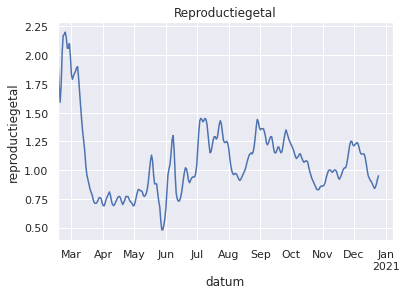

In [37]:
rg=rgdata['Rt_avg']
rg.plot()
plt.xlabel('datum')
plt.ylabel('reproductiegetal')
plt.title('Reproductiegetal')

In [9]:
import os
os.remove('COVID-19_aantallen_gemeente_per_dag.csv')
wget.download('https://data.rivm.nl/covid-19/COVID-19_aantallen_gemeente_per_dag.csv')

'COVID-19_aantallen_gemeente_per_dag.csv'

In [10]:
gemdata=pd.read_csv('COVID-19_aantallen_gemeente_per_dag.csv',sep=';',index_col='Date_of_publication',parse_dates=True)
gemdata.head()

,Date_of_report,Municipality_code,Municipality_name,Province,Security_region_code,Security_region_name,Municipal_health_service,ROAZ_region,Total_reported,Hospital_admission,Deceased
Date_of_publication,,,,,,,,,,,
2020-02-27,2021-01-12 10:00:00,GM0014,Groningen,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0,0
2020-02-27,2021-01-12 10:00:00,GM0034,Almere,Flevoland,VR25,Flevoland,GGD Flevoland,SpoedZorgNet,0,0,0
2020-02-27,2021-01-12 10:00:00,GM0037,Stadskanaal,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0,0
2020-02-27,2021-01-12 10:00:00,GM0047,Veendam,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0,0
2020-02-27,2021-01-12 10:00:00,GM0050,Zeewolde,Flevoland,VR25,Flevoland,GGD Flevoland,SpoedZorgNet,0,0,0


Text(0.5, 1.0, 'Vlaardingen, per dag')

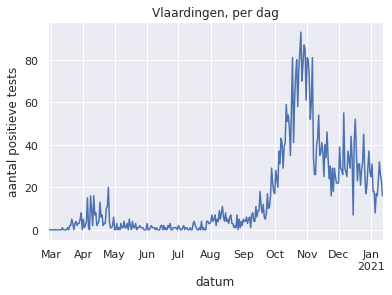

In [41]:
vld=gemdata[gemdata.Municipality_name=='Vlaardingen']
vld_count=vld['Total_reported']
vld_count.plot()
plt.xlabel('datum')
plt.ylabel('aantal positieve tests')
plt.title('Vlaardingen, per dag')

In [16]:
weather=pd.read_csv('weather.csv',index_col='YYYYMMDD',parse_dates=True, low_memory=False)
weather.tail()

,# STN,DDVEC,FHVEC,FG,FHX,FHXH,FHN,FHNH,FXX,FXXH,...,VVNH,VVX,VVXH,NG,UG,UX,UXH,UN,UNH,EV24
YYYYMMDD,,,,,,,,,,,,,,,,,,,,,
2021-01-07,260,292,21,23,40,16,10,1,100,14,...,14,65,2,8,94,97,20,86,13,1
2021-01-08,260,341,8,13,30,12,10,1,50,11,...,19,70,11,6,95,98,7,81,14,3
2021-01-09,260,290,11,12,20,12,10,1,80,15,...,21,75,12,2,93,99,19,73,14,4
2021-01-10,260,222,24,24,40,20,10,1,70,20,...,1,75,11,7,89,98,1,75,13,3
2021-01-11,260,219,53,54,60,7,40,1,130,18,...,5,75,17,8,89,94,5,80,17,1


Text(0.5, 1.0, 'besmettingen vs. temperatuur')

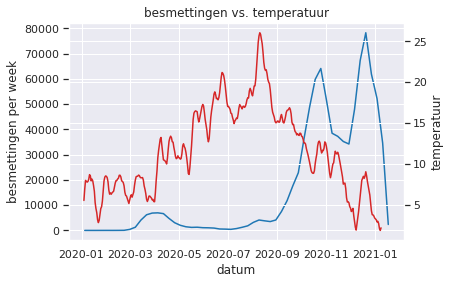

In [36]:
#weather.columns
daytemp=weather['   TG']
usetemp=daytemp.loc['2020-01-01':]/10
weektemp=usetemp.rolling(7,center=True).mean()
fig, ax1=plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('datum')
ax1.set_ylabel('besmettingen per week')
ax1.plot(weekly,color=color)

color = 'tab:red'
ax2 = ax1.twinx()
ax2.set_ylabel('temperatuur')
ax2.plot(weektemp,color=color)
plt.title('besmettingen vs. temperatuur')
#plt.xlabel('datum')
#plt.ylabel('temperatuur')